In [3]:
#Prophet Algo

In [259]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install prophet
!pip install statsmodels
!pip install scikit-learn
!pip install numpy seaborn
!pip install plotly
!pip install numpy pandas matplotlib seaborn
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm
!pip install --upgrade scikit-learn

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
import os
import plotly.express as px
import matplotlib.style as style

# Modelling
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Visualizations
import seaborn as sns
sns.set(rc={'figure.figsize': (20, 5)})

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

In [275]:
from prophet import Prophet

In [276]:
pd.options.display.max_columns=100

In [277]:
#Load The data
df_train = pd.read_csv('C:/Users/91773/OneDrive/Desktop/Unmesh/train.csv' , nrows=2000)
df_features = pd.read_csv('C:/Users/91773/OneDrive/Desktop/Unmesh/features.csv' ,nrows=2000)
df_stores = pd.read_csv('C:/Users/91773/OneDrive/Desktop/Unmesh/stores.csv', nrows=2000)


In [278]:
# convert Date to datetime
df_train["Date"] = pd.to_datetime(df_train["Date"])
# df_test["Date"] = pd.to_datetime(df_test["Date"])
df_features["Date"] = pd.to_datetime(df_features["Date"])

In [279]:
train_data = df_train.merge(df_features, on=['Store','Date'], how='inner').merge(df_stores, on=['Store'], how='inner')

In [280]:
train_data.shape

(2000, 17)

In [281]:
train_data.isna().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday_x        0
Temperature        0
Fuel_Price         0
MarkDown1       1288
MarkDown2       1413
MarkDown3       1302
MarkDown4       1288
MarkDown5       1288
CPI                0
Unemployment       0
IsHoliday_y        0
Type               0
Size               0
dtype: int64

In [282]:
# Prepare data for Prophet
train_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y','IsHoliday_x':'IsHoliday'}, inplace=True)
#test_data.rename(columns={'Date': 'ds'}, inplace=True)

In [283]:
train_data

,Store,Dept,ds,y,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,9,2012-10-26,41040.84,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315
1996,1,10,2012-10-26,26285.27,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315
1997,1,11,2012-10-26,22399.83,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315
1998,1,12,2012-10-26,8658.41,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315


In [284]:
cols_to_drop = ["IsHoliday_y","MarkDown1", "MarkDown2", "MarkDown3","MarkDown4","MarkDown5"]
train_data.drop(columns=cols_to_drop, inplace=True)


In [285]:
train_data.head()

,Store,Dept,ds,y,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


In [286]:
train_size = int(len(train_data) * 0.75)
train_data_1 = train_data.iloc[:train_size]
test_data_1 = train_data.iloc[train_size:]

In [287]:
train_data_2 = train_data_1[train_data_1.Dept==1][['ds','y','Temperature','Fuel_Price','Unemployment']]
train_data_2

,ds,y,Temperature,Fuel_Price,Unemployment
0,2010-02-05,24924.50,42.31,2.572,8.106
14,2010-02-12,46039.49,38.51,2.548,8.106
28,2010-02-19,41595.55,39.93,2.514,8.106
42,2010-02-26,19403.54,46.63,2.561,8.106
56,2010-03-05,21827.90,46.50,2.625,8.106
...,...,...,...,...,...
1442,2012-01-27,18378.16,54.26,3.290,7.348
1456,2012-02-03,23510.49,56.55,3.360,7.348
1470,2012-02-10,36988.49,48.02,3.409,7.348
1484,2012-02-17,54060.10,45.32,3.510,7.348


In [290]:
train_data_2 = train_data_2
train_data_2['ds'] = pd.to_datetime(train_data_2['ds'])

In [200]:
# train_data = train_data_2.dropna()
# train_data['IsHoliday'].fillna(False, inplace=True)


In [292]:
test_data_2 = test_data_1[test_data_1.Dept ==1][['ds','y','Temperature','Fuel_Price','Unemployment']]
test_data_2

,ds,y,Temperature,Fuel_Price,Unemployment
1512,2012-03-02,20113.03,60.96,3.630,7.348
1526,2012-03-09,21140.07,58.76,3.669,7.348
1540,2012-03-16,22366.88,64.74,3.734,7.348
1554,2012-03-23,22107.70,65.93,3.787,7.348
1568,2012-03-30,28952.86,67.61,3.845,7.348
1582,2012-04-06,57592.12,70.43,3.891,7.143
1596,2012-04-13,34684.21,69.07,3.891,7.143
1610,2012-04-20,16976.19,66.76,3.877,7.143
1624,2012-04-27,16347.60,67.23,3.814,7.143
1638,2012-05-04,17147.44,75.55,3.749,7.143


In [293]:
model = Prophet()

In [294]:
#model.add_regressor('IsHoliday')
model.fit(train_data_2)

13:10:09 - cmdstanpy - INFO - Chain [1] start processing
13:10:09 - cmdstanpy - INFO - Chain [1] done processing


In [295]:
future = model.make_future_dataframe(periods=6,freq = 'MS')


In [296]:
# future['IsHoliday'] = train_data['IsHoliday']

In [297]:
# future = model.make_future_dataframe(periods=6,freq = 'MS')
# future
prophet_prediction = model.predict(future)
prophet_prediction[['ds','yhat']].tail(7)

,ds,yhat
107,2012-02-24,30972.456605
108,2012-03-01,22493.876922
109,2012-04-01,32624.193271
110,2012-05-01,23983.350933
111,2012-06-01,14977.933904
112,2012-07-01,14277.499255
113,2012-08-01,13896.306949


In [298]:
metric_prophet_1 = prophet_prediction.set_index('ds')[['yhat']].join(test_data_2.set_index('ds').y).reset_index()
metric_prophet_1.dropna(inplace=True)
rms_prophet_1 = mean_squared_error(metric_prophet_1.y, metric_prophet_1.yhat)
rmse_p = np.sqrt(rms_prophet_1)


In [299]:
rmse_p

1087.5560962782347

In [162]:
prophet_prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,23456.889243,24987.167768,41501.995420,23456.889243,23456.889243,9664.526355,9664.526355,9664.526355,9664.526355,9664.526355,9664.526355,0.0,0.0,0.0,33121.415597
1,2010-02-12,23445.588997,31285.708442,47587.286266,23445.588997,23445.588997,15829.073670,15829.073670,15829.073670,15829.073670,15829.073670,15829.073670,0.0,0.0,0.0,39274.662668
2,2010-02-19,23434.288752,29589.290347,45426.431480,23434.288752,23434.288752,13876.215672,13876.215672,13876.215672,13876.215672,13876.215672,13876.215672,0.0,0.0,0.0,37310.504424
3,2010-02-26,23422.988506,20765.434313,36833.569314,23422.988506,23422.988506,5188.252235,5188.252235,5188.252235,5188.252235,5188.252235,5188.252235,0.0,0.0,0.0,28611.240742
4,2010-03-05,23411.688261,11321.163975,27238.784231,23411.688261,23411.688261,-3786.005686,-3786.005686,-3786.005686,-3786.005686,-3786.005686,-3786.005686,0.0,0.0,0.0,19625.682575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2012-04-01,22188.034081,24274.862625,40963.274173,22188.034010,22188.034151,10436.159190,10436.159190,10436.159190,10436.159190,10436.159190,10436.159190,0.0,0.0,0.0,32624.193271
110,2012-05-01,22139.604510,15858.539671,32826.834716,22139.604375,22139.604645,1843.746423,1843.746423,1843.746423,1843.746423,1843.746423,1843.746423,0.0,0.0,0.0,23983.350933
111,2012-06-01,22089.560621,6821.144138,22715.269668,22089.560412,22089.560836,-7111.626718,-7111.626718,-7111.626718,-7111.626718,-7111.626718,-7111.626718,0.0,0.0,0.0,14977.933904
112,2012-07-01,22041.131051,6091.335410,22570.169132,22041.130749,22041.131366,-7763.631796,-7763.631796,-7763.631796,-7763.631796,-7763.631796,-7763.631796,0.0,0.0,0.0,14277.499255


In [121]:
# prophet_prediction1 = prophet_prediction[['ds','yhat']].tail(35)

In [300]:
# import matplotlib.pyplot as plt

# # Plot actual values
# plt.plot(test_data_2['ds'], test_data_2['y'], label='Actual', color='blue')

# # Plot predicted values
# plt.plot(prophet_prediction1['ds'], prophet_prediction1['yhat'], label='Predicted', color='red')

# # Add labels and legend
# plt.xlabel('Date')
# plt.ylabel('Sale')
# plt.legend()

# # Show the plot
# plt.show()


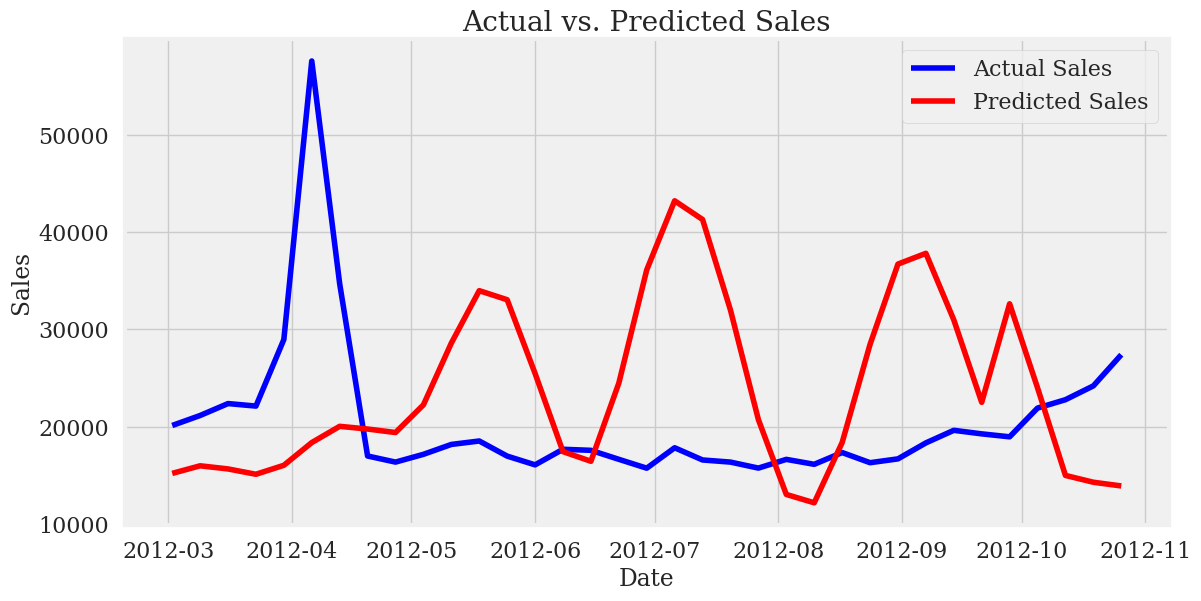

In [139]:
import matplotlib.pyplot as plt

# Extract actual sales values from the test set
actual_sales = test_data_2['y'].values

# Extract predicted sales values from the forecast
predicted_sales = prophet_prediction[-len(test_data_2):]['yhat'].values

# Plot actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(test_data_2['ds'], actual_sales, label='Actual Sales', color='blue')
plt.plot(test_data_2['ds'], predicted_sales, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()


In [219]:
data = pd.DataFrame()

In [233]:
data['predicted_value'] = prophet_prediction['yhat']
selected_rows = data['predicted_value'][:35]

In [234]:
selected_rows

0     33121.415597
1     39274.662668
2     37310.504424
3     28611.240742
4     19625.682575
5     16855.399697
6     21537.503529
7     29139.728023
8     33987.394813
9     34087.771546
10    31465.493937
11    28632.814940
12    25858.061576
13    22131.541074
14    17793.542895
15    14943.676285
16    15021.345373
17    16837.051670
18    17785.374214
19    16813.426739
20    15424.624254
21    15524.295675
22    16937.614037
23    17744.691722
24    16853.988811
25    15375.950092
26    15056.606844
27    15967.193291
28    16584.011604
29    16099.827990
30    15711.350671
31    16966.469154
32    19361.175094
33    20699.858737
34    20180.414306
Name: predicted_value, dtype: float64

In [236]:
test_data_2['y'].shape

(35,)

In [224]:
data

,predicted_value,actual_value
0,33121.415597,NaN
1,39274.662668,NaN
2,37310.504424,NaN
3,28611.240742,NaN
4,19625.682575,NaN
...,...,...
109,32624.193271,NaN
110,23983.350933,NaN
111,14977.933904,NaN
112,14277.499255,NaN


In [229]:
data_2 = pd.DataFrame()
data_2['actual_values'] = test_data_2['y']

In [237]:
data_2['predicted'] = selected_rows

In [238]:
data_2

,actual_values,predicted
1512,20113.03,NaN
1526,21140.07,NaN
1540,22366.88,NaN
1554,22107.70,NaN
1568,28952.86,NaN
1582,57592.12,NaN
1596,34684.21,NaN
1610,16976.19,NaN
1624,16347.60,NaN
1638,17147.44,NaN
